# LOAN APPROVAL PREDICTION 

## Problem Statement

A finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

## About Dataset

The sample dataset includes various details,such as:

#### Categorical Columns: 
Gender (Male/Female), Married (Yes/No), Number of dependents (Possible values:0,1,2,3+), Education (Graduate / Not Graduate), Self-Employed (Yes/No), credit history(Yes/No), Property Area (Rural/Semi-Urban/Urban) and Loan Status (Y/N)(i.e. Target variable)

#### Numerical Columns:
Loan ID, Applicant Income, Co-applicant Income, Loan Amount, and Loan amount term


## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset

In [3]:
loan_data = pd.read_csv("loan_prediction.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Descriptive statistics

In [4]:
loan_data.shape

(614, 13)

Total no. of rows = 614,
Total no. of columns = 13

In [5]:
#summary of dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [6]:
#Descriptive summary of dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#checking for null values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
loan_data_cleaned = loan_data.copy(deep = True)

#### Loan_ID is not relevant therefore dropping it.

In [11]:
loan_data_cleaned.drop('Loan_ID',axis=1, inplace=True)

# Univariate Analysis 

<AxesSubplot:xlabel='Gender', ylabel='Count'>

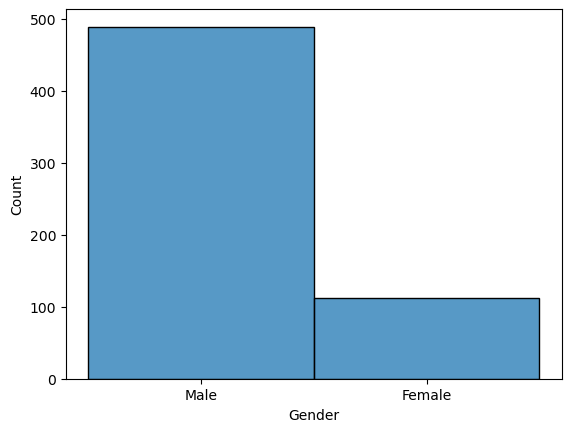

In [6]:
sns.histplot(loan_data_cleaned['Gender'])

Count of Male applicants is more than Female

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

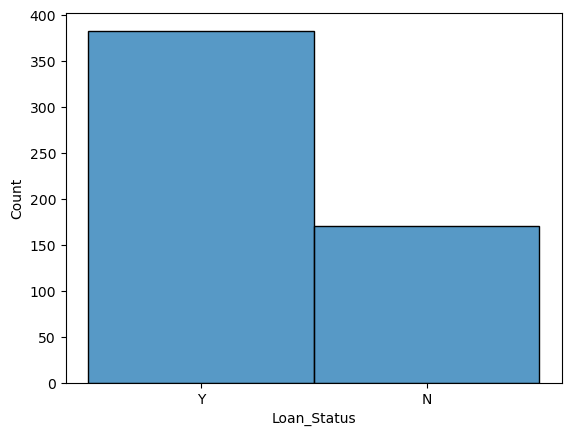

In [71]:
sns.histplot(loan_data_cleaned['Loan_Status'])

More Loans are approved Vs Rejected

<AxesSubplot:xlabel='Married', ylabel='Count'>

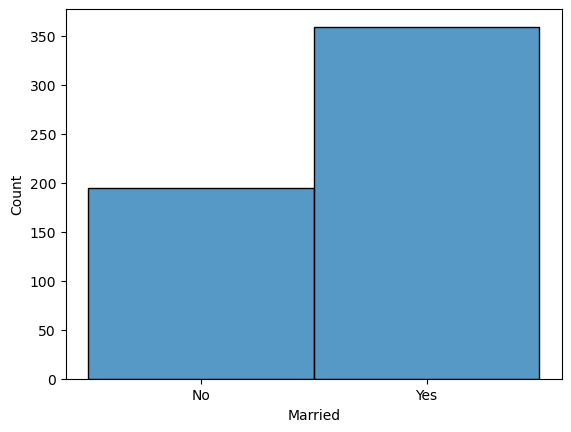

In [74]:
sns.histplot(loan_data_cleaned['Married'])

Count of Married applicant is more than Non-married

<AxesSubplot:xlabel='Education', ylabel='Count'>

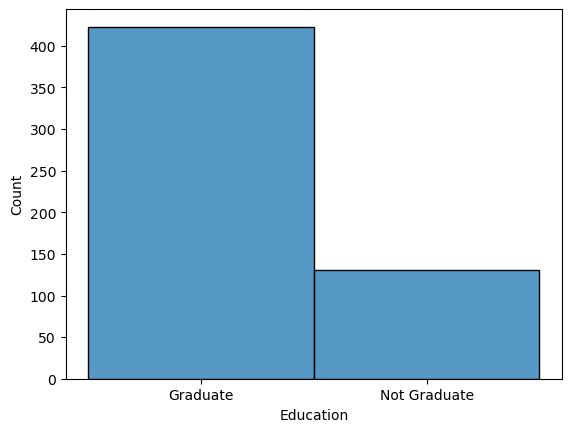

In [75]:
sns.histplot(loan_data_cleaned['Education'])

Count of graduate is more than non-Graduate

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

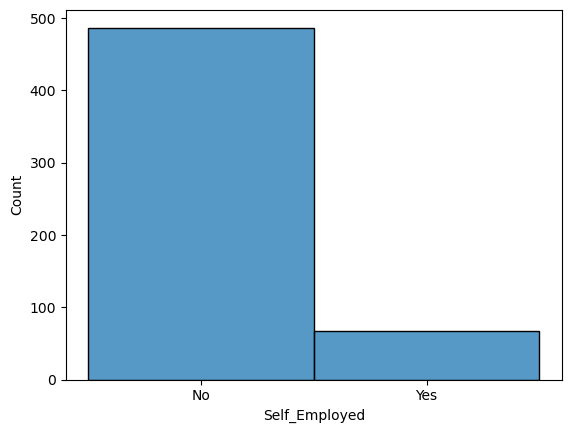

In [76]:
sns.histplot(loan_data_cleaned['Self_Employed'])

Count of Self employed is less than non-self employed

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

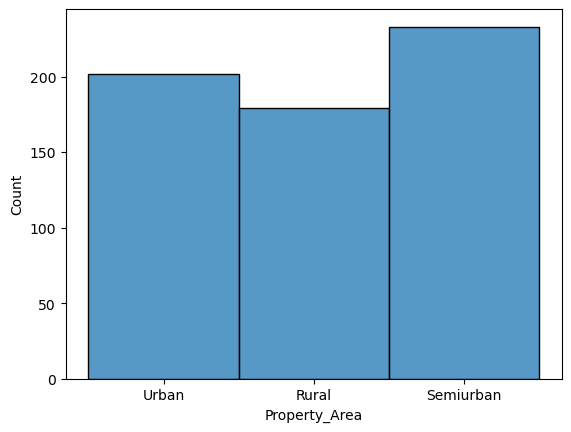

In [13]:
sns.histplot(loan_data_cleaned['Property_Area'])

Maximum properties are located in Semiurban areas

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

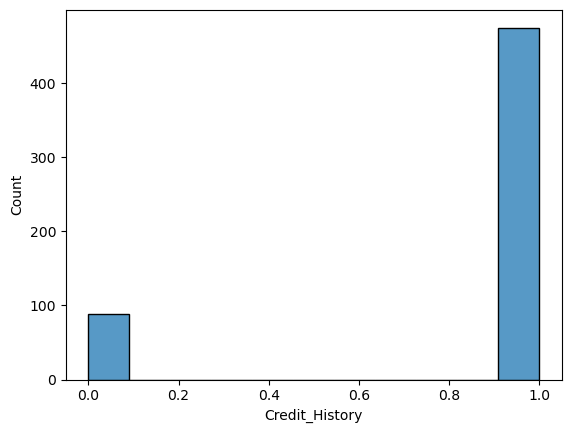

In [14]:
sns.histplot(loan_data_cleaned['Credit_History'])

Credit History is present for many applicants

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

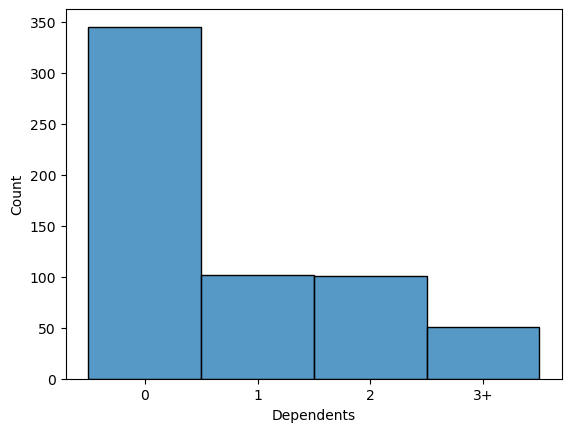

In [15]:
sns.histplot(loan_data_cleaned['Dependents'])

The count of applicants with several dependents=0 is maximum

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

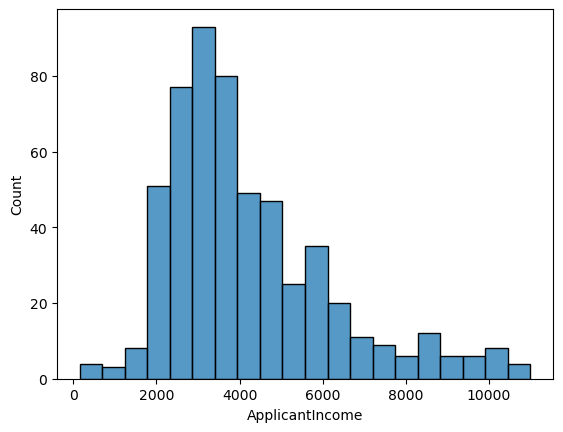

In [77]:
sns.histplot(loan_data_cleaned['ApplicantIncome'])

In [12]:
loan_data_cleaned['ApplicantIncome'].mean()

5403.459283387622

According to graph average income is around 3000 but it's coming out to be ~5400 which means our data has outliers. we will be dealing with them later on.

# Dealing with null values

In [53]:
loan_data_cleaned.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
#GENDER
value_to_fill = loan_data_cleaned['Gender'].mode()[0]
loan_data_cleaned['Gender'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
#MARRIED
value_to_fill = loan_data_cleaned['Married'].mode()[0]
loan_data_cleaned['Married'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
#DEPENDENTS
value_to_fill = loan_data_cleaned['Dependents'].mode()[0]
loan_data_cleaned['Dependents'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
#SELF EMPLOYED
value_to_fill = loan_data_cleaned['Self_Employed'].mode()[0]
loan_data_cleaned['Self_Employed'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
loan_data_cleaned['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [59]:
# Its only proper to fill null values of loan amount term with mode
value_to_fill = loan_data_cleaned['Loan_Amount_Term'].mode()[0]
loan_data_cleaned['Loan_Amount_Term'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
#CREDIT HISTORY
value_to_fill = loan_data_cleaned['Credit_History'].mode()[0]
loan_data_cleaned['Credit_History'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [61]:
loan_data_cleaned['LoanAmount'].median()

128.0

### Since loan amount gave us skewed result we will fill null values with median

In [62]:
#LOAN AMOUNT
value_to_fill = loan_data_cleaned['LoanAmount'].median()
loan_data_cleaned['LoanAmount'].fillna(value_to_fill,inplace=True)
loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
loan_data_cleaned.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers

## Applicant Income

### Relation between Applicant Income and Loan status

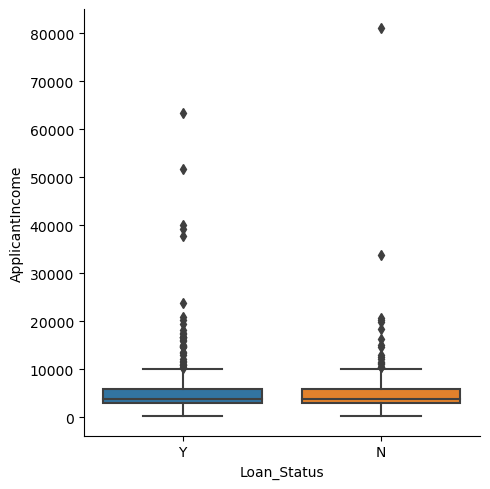

In [64]:
sns.catplot(data=loan_data_cleaned, y='ApplicantIncome', x='Loan_Status', kind ='box')

In [65]:
q1, q3 = np.percentile(loan_data_cleaned['ApplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['ApplicantIncome'] < lower_bound) | (loan_data_cleaned['ApplicantIncome'] > upper_bound)]
outliers

10171.25


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,Male,Yes,0,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
106,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y
126,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N


## Removing outliers

In [66]:
#taking 11,100 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['ApplicantIncome'] > 11100].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
565,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
566,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
567,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
568,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Coapplicant Income

### Relation between Coapplicant Income and Loan status

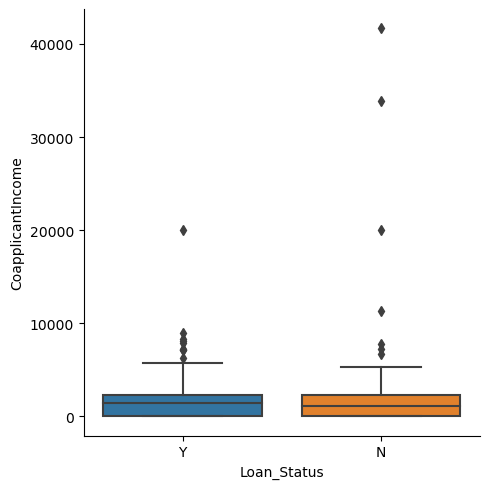

In [67]:
sns.catplot(data=loan_data_cleaned, y='CoapplicantIncome', x='Loan_Status', kind ='box')

In [68]:
q1, q3 = np.percentile(loan_data_cleaned['CoapplicantIncome'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(upper_bound)
outliers = loan_data_cleaned[(loan_data_cleaned['CoapplicantIncome'] < lower_bound) | (loan_data_cleaned['CoapplicantIncome'] > upper_bound)]
outliers

5838.125


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
36,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
116,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
127,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
164,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
167,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
237,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
325,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
346,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y
376,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1.0,Semiurban,Y


## Removing outliers

In [69]:
#taking 5,900 as threshold
index_drop=loan_data_cleaned[loan_data_cleaned['CoapplicantIncome'] > 5900].index
loan_data_cleaned=loan_data_cleaned.drop(index_drop).reset_index(drop=True)
loan_data_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
549,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
550,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
551,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
552,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


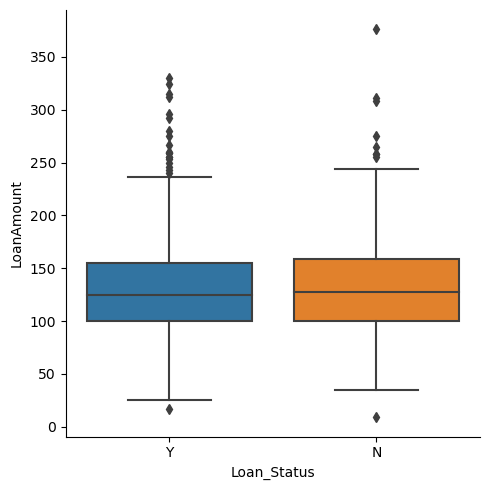

In [21]:
sns.catplot(data=loan_data_cleaned, y='LoanAmount', x='Loan_Status', kind ='box')

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

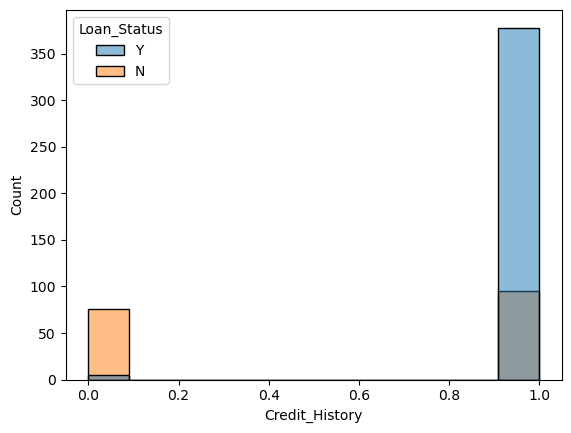

In [24]:
sns.histplot(data=loan_data_cleaned, x="Credit_History", hue="Loan_Status")

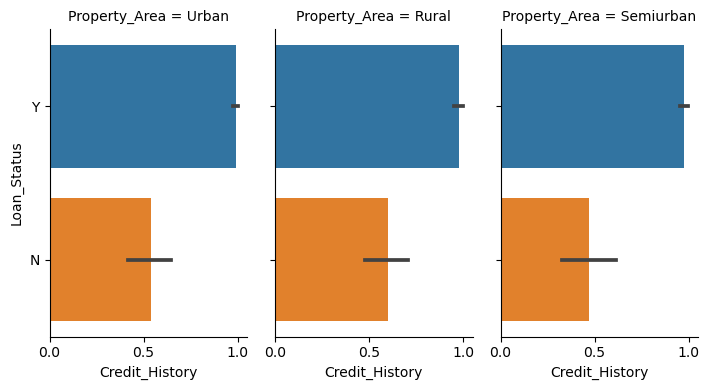

In [63]:
sns.catplot(data=loan_data, x="Credit_History", y="Loan_Status", col="Property_Area",kind="bar", height=4, aspect=.6,)

# Data preparation

## Converting categorical columns to numerical

## One hot encoding

In [70]:
loan_data_encoded_ = loan_data_cleaned.copy(deep = True)
loan_data_encoded_.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
# Importing onehotencoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()

In [72]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             554 non-null    object 
 1   Married            554 non-null    object 
 2   Dependents         554 non-null    object 
 3   Education          554 non-null    object 
 4   Self_Employed      554 non-null    object 
 5   ApplicantIncome    554 non-null    int64  
 6   CoapplicantIncome  554 non-null    float64
 7   LoanAmount         554 non-null    float64
 8   Loan_Amount_Term   554 non-null    float64
 9   Credit_History     554 non-null    float64
 10  Property_Area      554 non-null    object 
 11  Loan_Status        554 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 52.1+ KB


In [73]:
#converting categorical variables to numerical
encoded_loan_data=encoder.fit_transform(loan_data_encoded_[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]).toarray()
encoded_loan_dataset=pd.DataFrame(encoded_loan_data,columns=encoder.get_feature_names_out())
encoded_loan_dataset

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
550,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
552,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [74]:
#merging dataframes
loan_data_encoded_=pd.concat([encoded_loan_dataset,loan_data_encoded_,],axis=1)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
550,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
552,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [75]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            554 non-null    float64
 1   Gender_Male              554 non-null    float64
 2   Married_No               554 non-null    float64
 3   Married_Yes              554 non-null    float64
 4   Dependents_0             554 non-null    float64
 5   Dependents_1             554 non-null    float64
 6   Dependents_2             554 non-null    float64
 7   Dependents_3+            554 non-null    float64
 8   Education_Graduate       554 non-null    float64
 9   Education_Not Graduate   554 non-null    float64
 10  Self_Employed_No         554 non-null    float64
 11  Self_Employed_Yes        554 non-null    float64
 12  Property_Area_Rural      554 non-null    float64
 13  Property_Area_Semiurban  554 non-null    float64
 14  Property_Area_Urban      5

In [76]:
#dropping unnecessary columns
loan_data_encoded_.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5849,0.0,128.0,360.0,1.0,Y
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,N
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,Y
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,Y
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,Y
550,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,Y
551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,8072,240.0,253.0,360.0,1.0,Y
552,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,7583,0.0,187.0,360.0,1.0,Y


In [25]:
loan_data_encoded_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    float64
 1   Gender_Male              614 non-null    float64
 2   Gender_nan               614 non-null    float64
 3   Married_No               614 non-null    float64
 4   Married_Yes              614 non-null    float64
 5   Married_nan              614 non-null    float64
 6   Dependents_0             614 non-null    float64
 7   Dependents_1             614 non-null    float64
 8   Dependents_2             614 non-null    float64
 9   Dependents_3+            614 non-null    float64
 10  Dependents_nan           614 non-null    float64
 11  Education_Graduate       614 non-null    float64
 12  Education_Not Graduate   614 non-null    float64
 13  Self_Employed_No         614 non-null    float64
 14  Self_Employed_Yes        6

In [77]:
loan_data_encoded_['Loan_Status']= loan_data_encoded_['Loan_Status'].map(lambda x: 1 if x == 'Y' else 0)

In [78]:
loan_data_encoded_

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,5849,0.0,128.0,360.0,1.0,1
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,1
550,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,1
551,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,8072,240.0,253.0,360.0,1.0,1
552,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,7583,0.0,187.0,360.0,1.0,1


# Analysis

## Checking for multicolinearity

### Covariance Matrix

In [27]:
loan_data_encoded_.corr()

,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Gender_Female,1.000000,-0.934236,-0.069469,0.364569,-0.367389,0.027384,0.145082,0.004466,-0.129953,-0.096319,...,0.041039,-0.080283,0.108623,-0.034530,-0.058809,-0.082912,-0.109520,0.074539,-0.013472,-0.017987
Gender_Male,-0.934236,1.000000,-0.290893,-0.336818,0.339026,-0.022579,-0.136662,0.008319,0.126145,0.064234,...,-0.027030,0.075128,-0.113069,0.044109,0.013933,0.082316,0.065501,-0.071026,0.026349,0.025407
Gender_nan,-0.069469,-0.290893,1.000000,-0.035885,0.037273,-0.010306,-0.006945,-0.035248,-0.004225,0.078716,...,-0.034486,0.005230,0.024871,-0.030746,0.118787,-0.007825,0.108859,-0.001056,-0.037289,-0.022814
Married_No,0.364569,-0.336818,-0.035885,1.000000,-0.989310,-0.051069,0.353905,-0.113853,-0.249547,-0.132566,...,0.044629,0.006805,-0.005845,-0.000546,-0.051708,-0.075948,-0.149743,0.102049,-0.006082,-0.091478
Married_Yes,-0.367389,0.339026,0.037273,-0.989310,1.000000,-0.095116,-0.341174,0.118052,0.253280,0.135217,...,-0.042086,-0.000220,-0.000229,0.000449,0.050194,0.080496,0.148367,-0.104608,0.001259,0.084281
Married_nan,0.027384,-0.022579,-0.010306,-0.051069,-0.095116,1.000000,-0.079355,-0.031276,-0.031092,-0.021090,...,-0.016431,-0.044949,0.041470,0.000648,0.009224,-0.032830,0.008570,0.019611,0.031654,0.047264
Dependents_0,0.145082,-0.136662,-0.006945,0.353905,-0.341174,-0.079355,1.000000,-0.505474,-0.502499,-0.340851,...,0.015057,0.060830,-0.006225,-0.052410,-0.090174,0.000949,-0.140050,0.105187,0.047673,0.006250
Dependents_1,0.004466,0.008319,-0.035248,-0.113853,0.118052,-0.031276,-0.505474,1.000000,-0.198046,-0.134337,...,0.013467,-0.084117,0.011661,0.069320,0.040861,-0.029769,0.063596,-0.087491,0.002684,-0.038740
Dependents_2,-0.129953,0.126145,-0.004225,-0.249547,0.253280,-0.031092,-0.502499,-0.198046,1.000000,-0.133547,...,-0.005215,-0.004298,-0.012017,0.016569,-0.034650,0.010016,0.019856,-0.007804,0.012880,0.062384
Dependents_3+,-0.096319,0.064234,0.078716,-0.132566,0.135217,-0.021090,-0.340851,-0.134337,-0.133547,1.000000,...,-0.017471,0.040670,0.007863,-0.047460,0.156687,0.041491,0.156271,-0.077850,-0.059706,-0.026123


<AxesSubplot:>

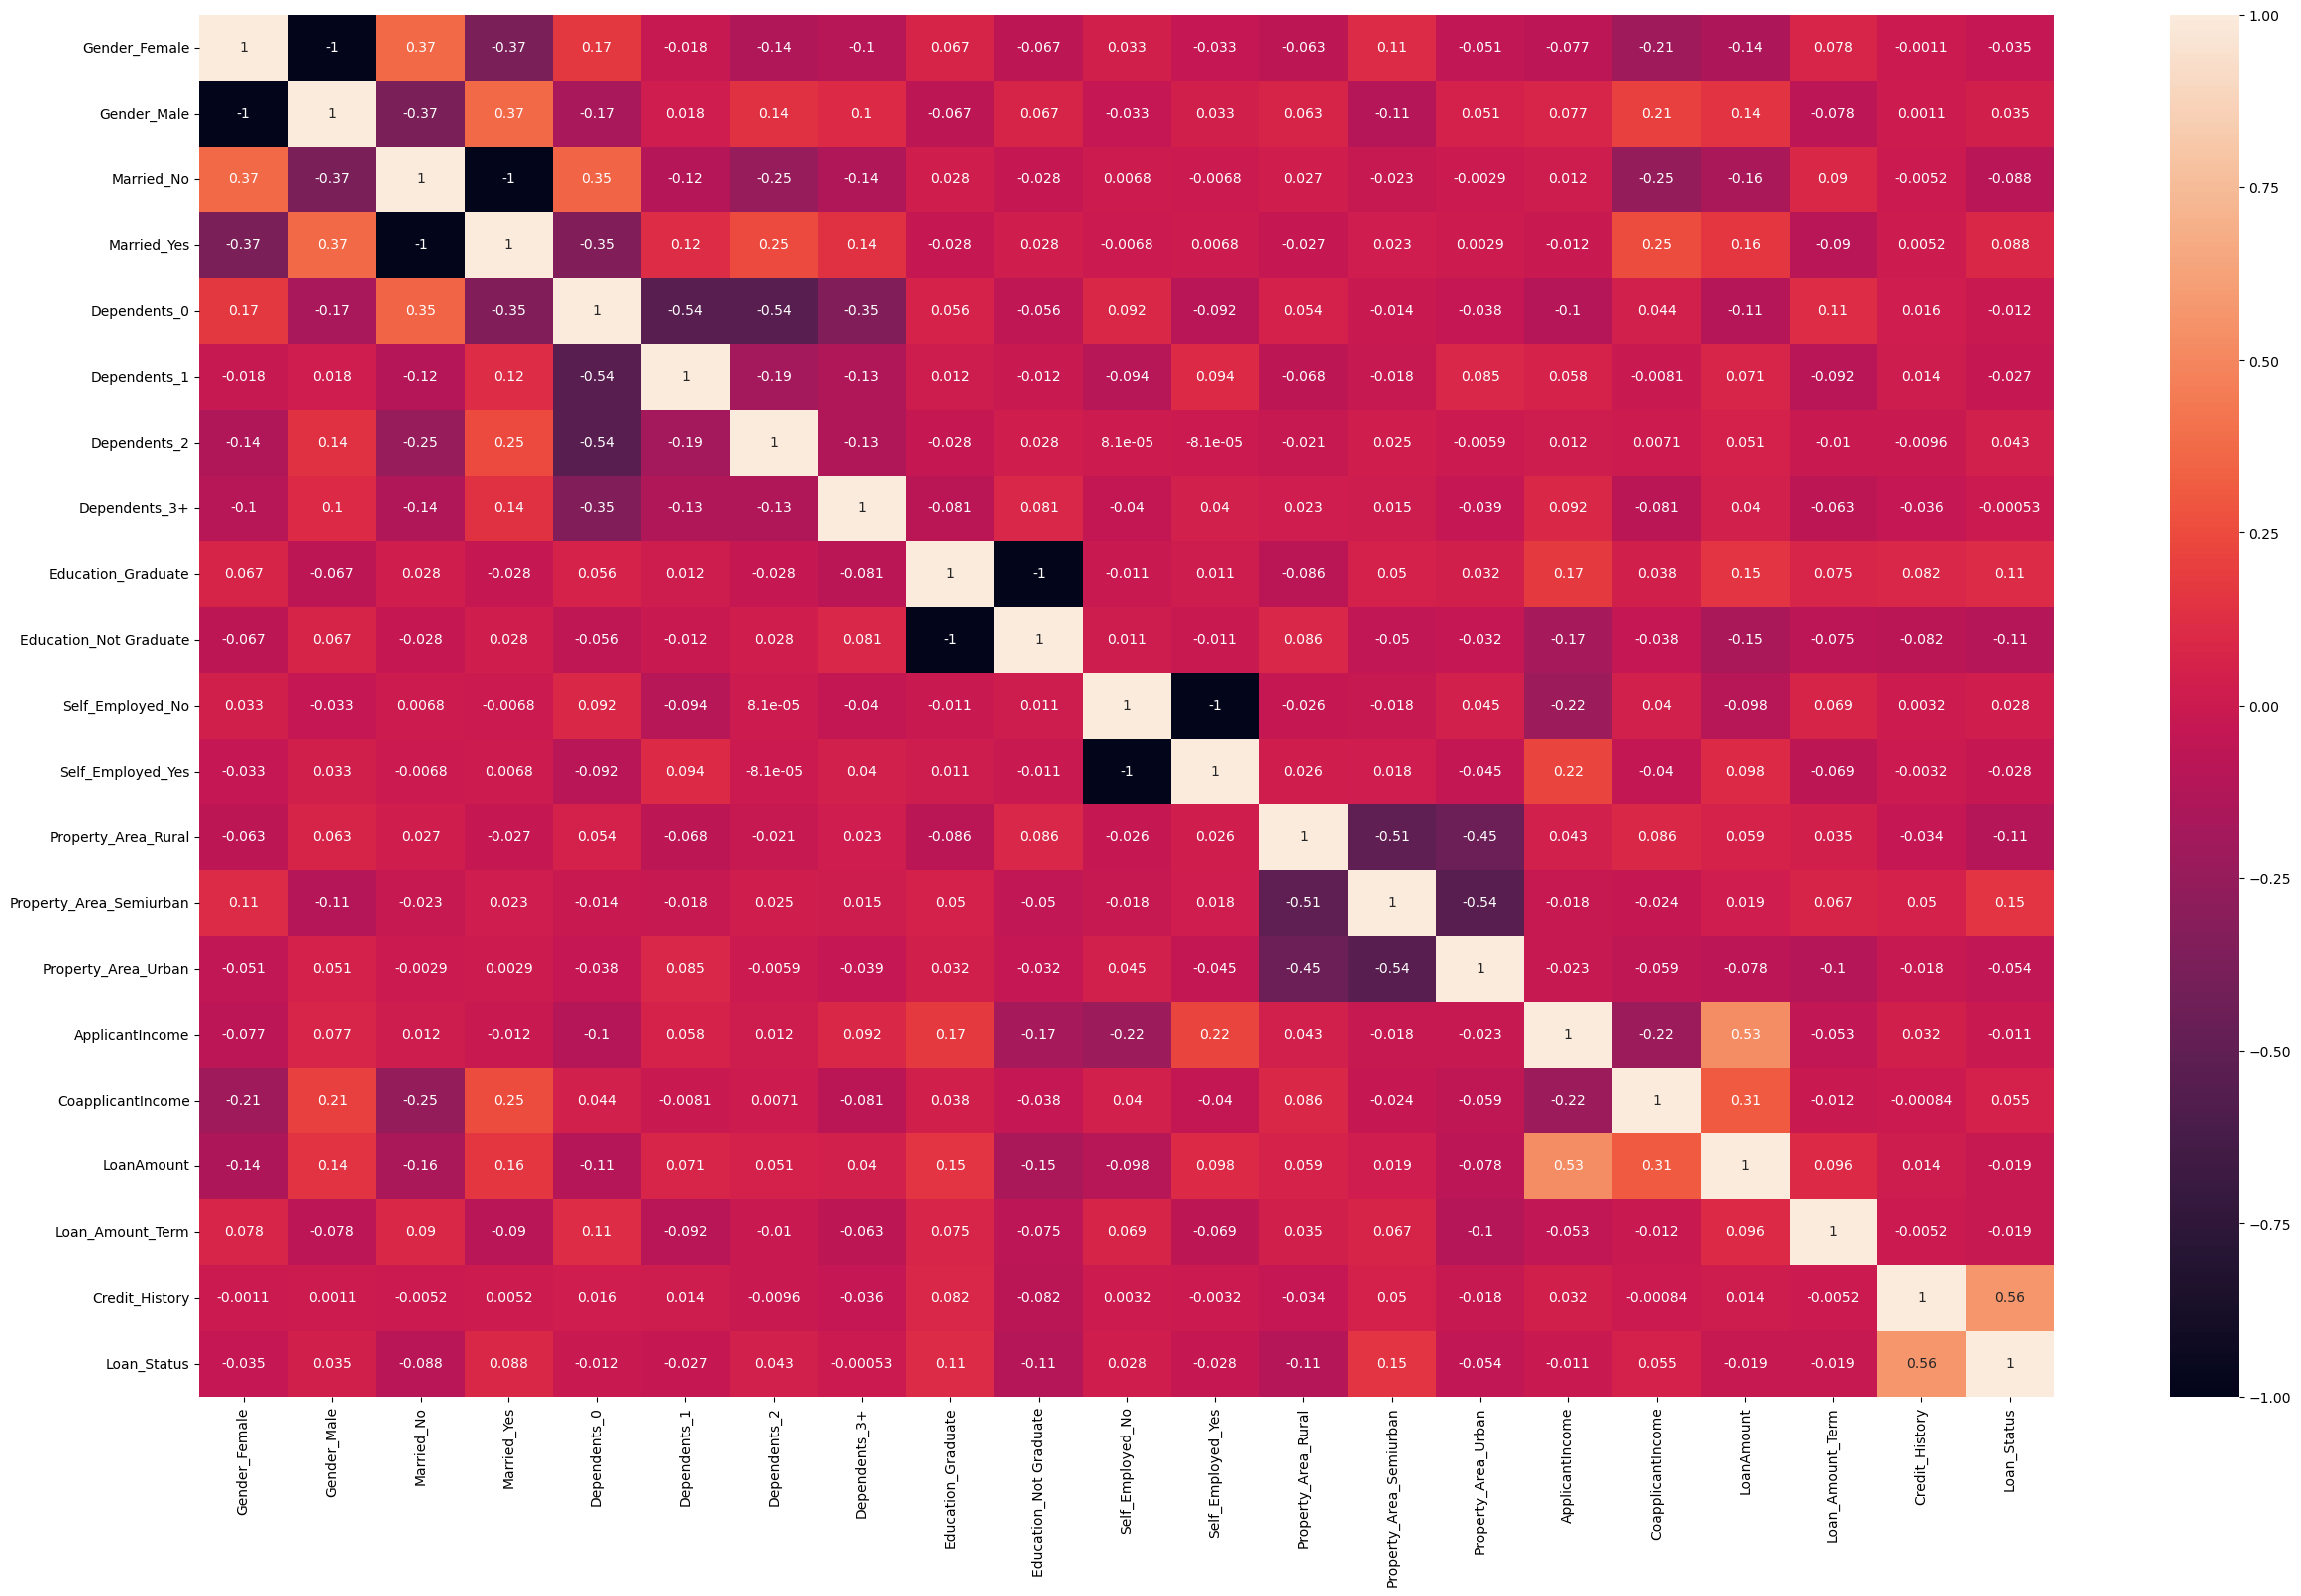

In [40]:
plt.figure(figsize=(30,18))
sns.heatmap(loan_data_encoded_.corr(),annot=True)

## Variance inflation Factor

In [33]:
# Create a DataFrame to store VIF results
import statsmodels.api as sm

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [sm.OLS(df[col], df.drop(col, axis=1)).fit().rsquared for col in df.columns]
    return vif_data

vif_result = calculate_vif(loan_data_encoded_)
vif_result

,Variable,VIF
0,Gender_Female,1.000000
1,Gender_Male,1.000000
2,Married_No,1.000000
3,Married_Yes,1.000000
4,Dependents_0,1.000000
5,Dependents_1,1.000000
6,Dependents_2,1.000000
7,Dependents_3+,1.000000
8,Education_Graduate,1.000000
9,Education_Not Graduate,1.000000


All VIF are less than 5 hence we can say that there is no muticolinearity in data

In [28]:
loan_data_encoded_.shape

(614, 25)

## Splitting data into independent and dependent features

In [79]:
X=loan_data_encoded_.iloc[:,:-1] #independent features
y=loan_data_encoded_.iloc[:,-1] #dependent features
y

0      1
1      0
2      1
3      1
4      1
      ..
549    1
550    1
551    1
552    1
553    0
Name: Loan_Status, Length: 554, dtype: int64

## Splitting into train and test

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
y_train.shape,X_test.shape,X_train.shape,y_test.shape


((415,), (139, 20), (415, 20), (139,))

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [83]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
X_train

array([[-0.47729514,  0.47729514, -0.76813951, ...,  0.78756806,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ..., -0.08581873,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ..., -1.15329148,
        -2.50672439,  0.41511009],
       ...,
       [ 2.09513971, -2.09513971,  1.30184684, ...,  0.36057897,
         2.11104293,  0.41511009],
       [ 2.09513971, -2.09513971,  1.30184684, ...,  0.41880475,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ..., -0.74571097,
         2.11104293,  0.41511009]])

In [85]:
X_test

array([[-0.47729514,  0.47729514,  1.30184684, ...,  1.5056861 ,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ..., -0.648668  ,
         0.263936  ,  0.41511009],
       [ 2.09513971, -2.09513971,  1.30184684, ...,  0.2053102 ,
         2.11104293, -2.40899952],
       ...,
       [ 2.09513971, -2.09513971,  1.30184684, ..., -0.99802271,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ..., -0.04700154,
         0.263936  ,  0.41511009],
       [-0.47729514,  0.47729514, -0.76813951, ...,  1.0592884 ,
         0.263936  ,  0.41511009]])

In [86]:
independent=loan_data_encoded_.drop('Loan_Status',axis=1) #Independent Variabe
dependent=loan_data_encoded_[['Loan_Status']] #Depedent Variable

In [87]:
independent.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5849,0.0,128.0,360.0,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2583,2358.0,120.0,360.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6000,0.0,141.0,360.0,1.0


In [88]:
dependent.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


## Importing model 

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [93]:
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [94]:
cross_val_score(classifier,X_train,y_train,cv=5,scoring='accuracy').mean()   #traing accuracy

0.8144578313253013

In [95]:
from sklearn.metrics import accuracy_score, classification_report

In [96]:
score= accuracy_score(y_pred,y_test)
print(score)   #82%

0.8201438848920863


In [97]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.95      0.60        20
           1       0.99      0.80      0.88       119

    accuracy                           0.82       139
   macro avg       0.72      0.87      0.74       139
weighted avg       0.91      0.82      0.84       139



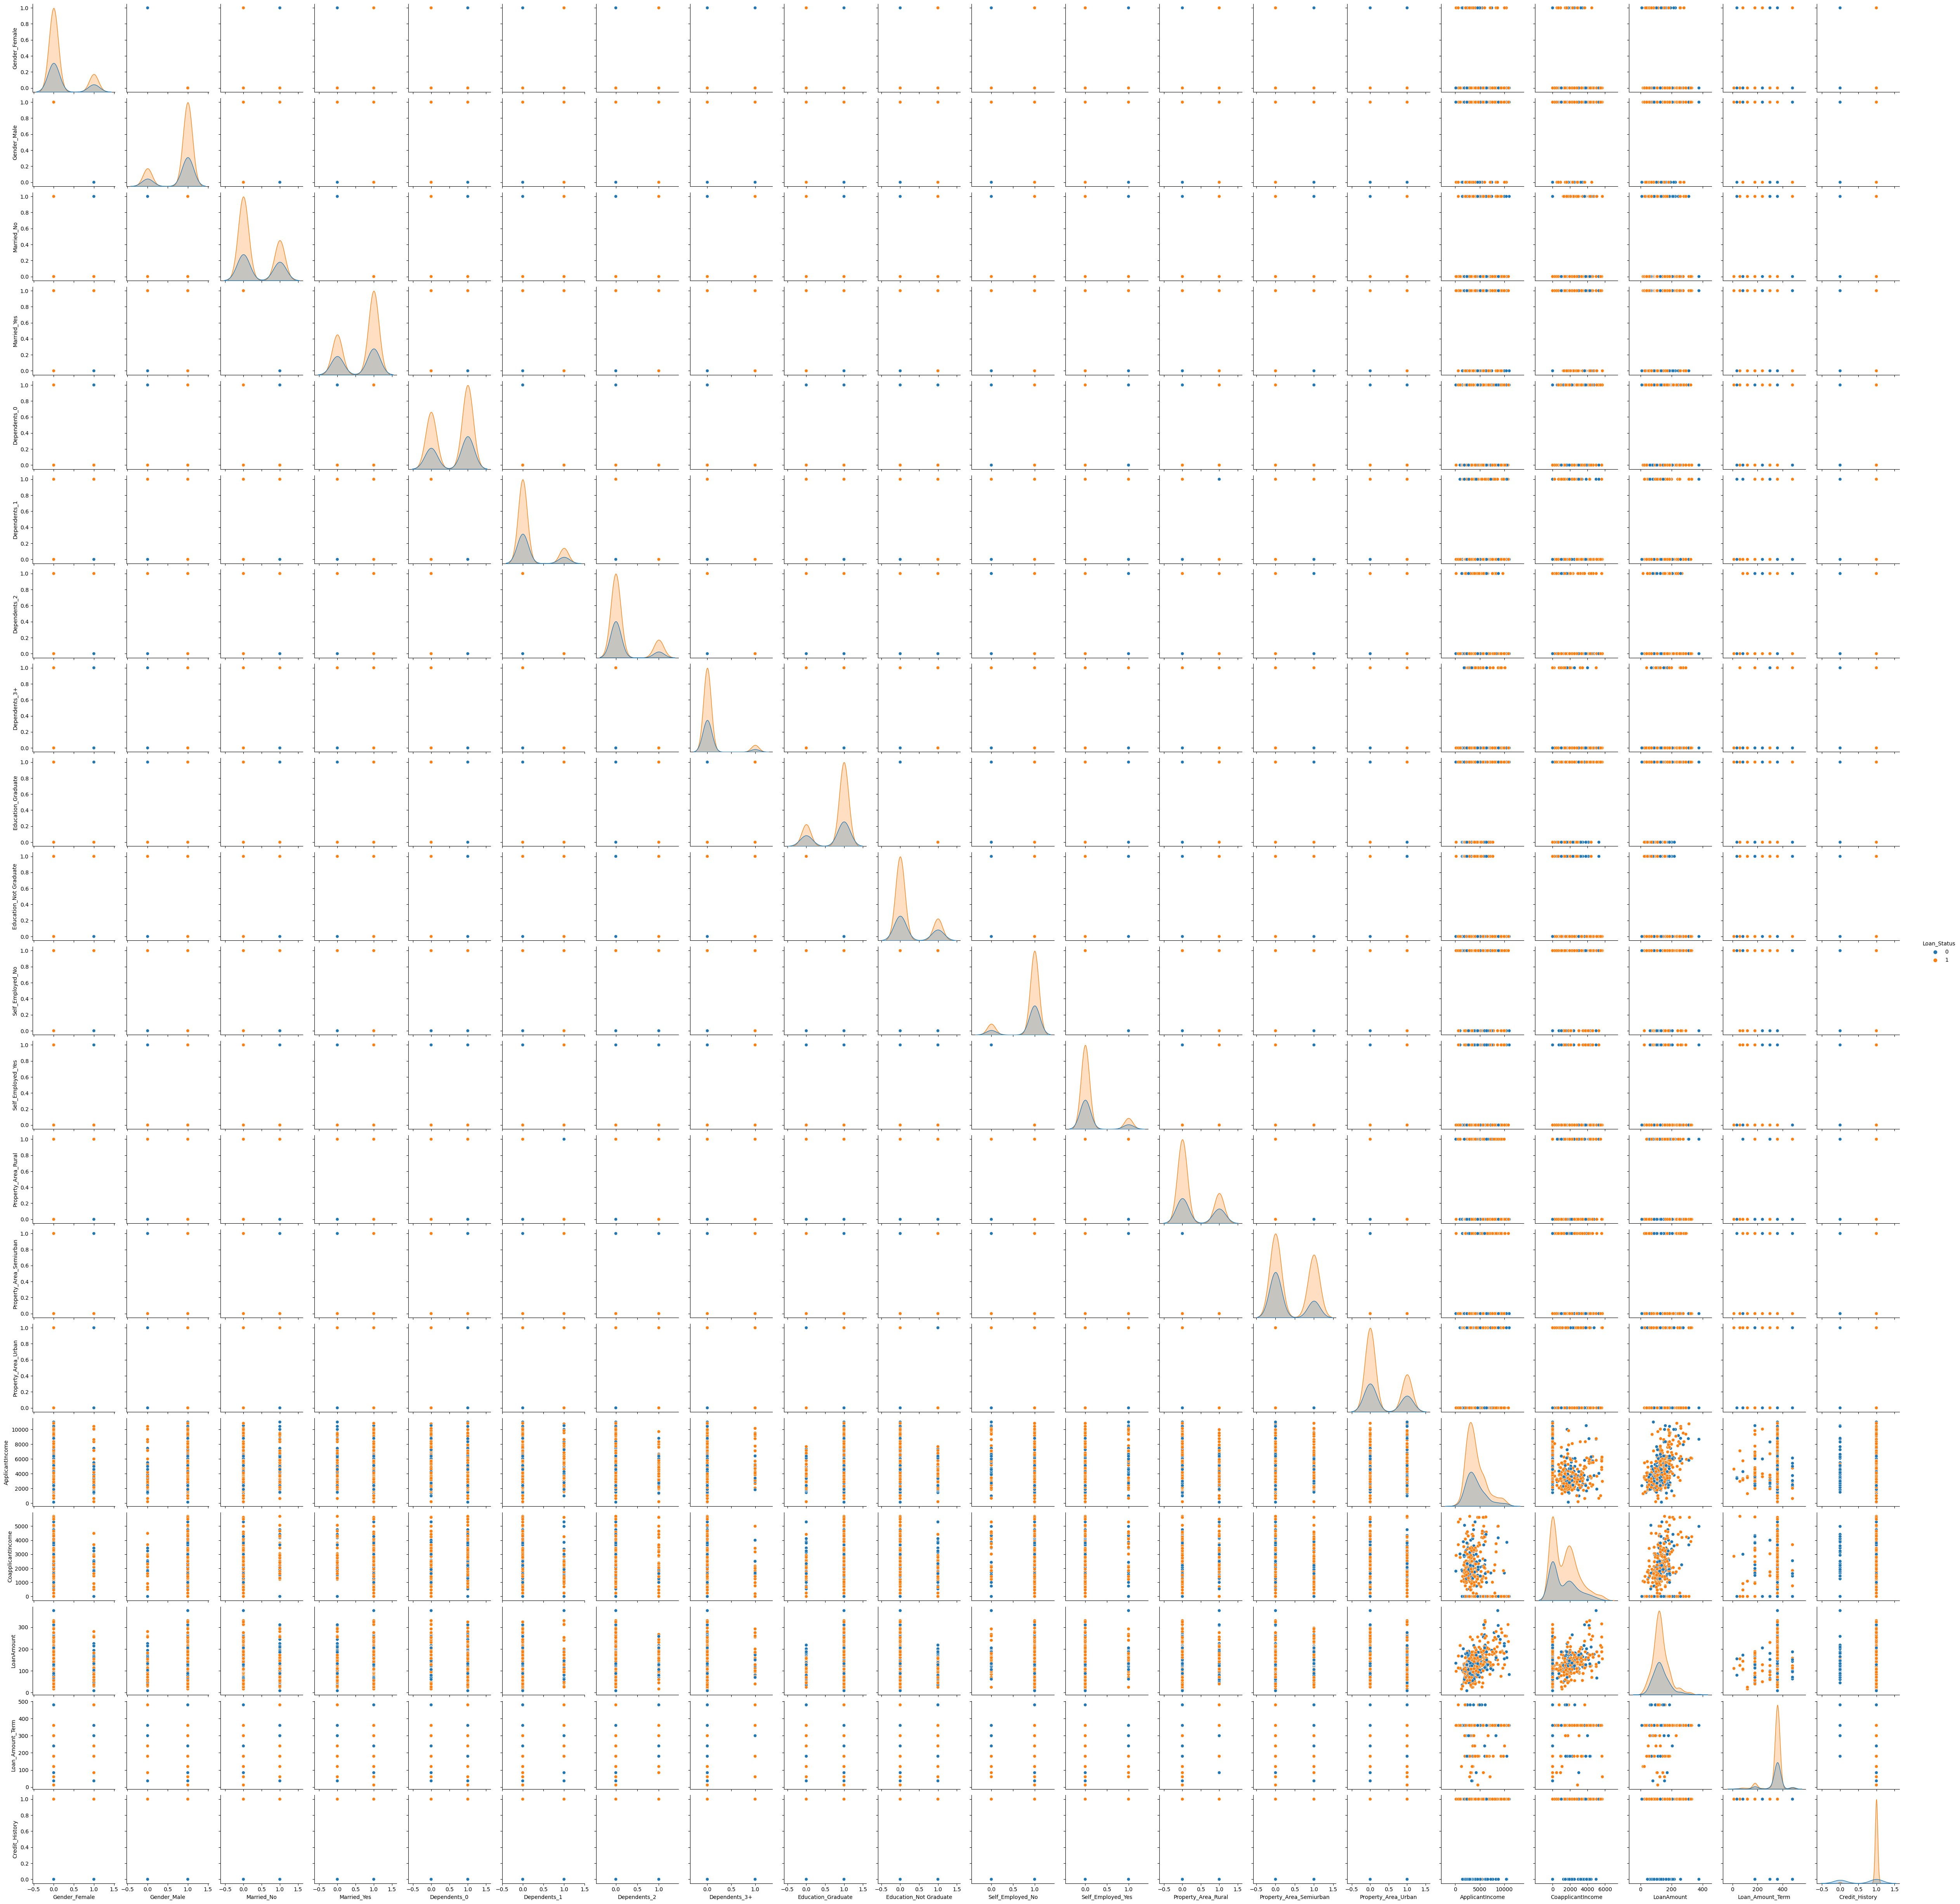

In [79]:
sns.pairplot(loan_data_encoded_, hue='Loan_Status')

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
treemodel= DecisionTreeClassifier()

In [100]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

In [108]:
y_pred= treemodel.predict(X_test)

In [109]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [110]:
score= accuracy_score(y_pred,y_test)
score

0.697841726618705

In [111]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55        51
           1       0.74      0.81      0.77        88

    accuracy                           0.70       139
   macro avg       0.67      0.66      0.66       139
weighted avg       0.69      0.70      0.69       139



Logistic Regression worked better than other model with accuracy score of 0.82

## Thank You